# SMS Classification - Text Analytics - NLP

In [5]:
# SMS Classification - Text Analytics

# Here, we are using SMS dataset and using NLP techniques, we are trying to classify these SMS as Ham or Spam.

In [43]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [9]:
# Reading the dataset

data = pd.read_table('sms.tsv', header = None, names = ['Label', 'Message'])

In [10]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.shape

# Our dataset is having 2 columns and 5,572 records.

(5572, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
data['Label'].value_counts(normalize = True)*100

# Our dataset consists of 87 % Ham SMS and 13% Spam SMS.

ham     86.593683
spam    13.406317
Name: Label, dtype: float64

In [17]:
# Converting target variable - Label from categorical to numeric values

data['Label_1'] = data['Label'].replace({'ham' : 0, 'spam' : 1})

In [18]:
data.head()

,Label,Message,Label_1
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
# Defining X and y variables

X = data['Message']
y = data['Label_1']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [22]:
# Spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [26]:
# Vectorize the text datset

toNumeric = CountVectorizer()

In [28]:
# Create vocabulary and create document-term matrix (DTM)

toNumeric.fit(X_train)
X_train_dtm = toNumeric.transform(X_train)

In [29]:
X_train_dtm

<4457x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 59028 stored elements in Compressed Sparse Row format>

In [30]:
# Transform test data using fitted vocabulary into DTM

X_test_dtm = toNumeric.transform(X_test)
X_test_dtm

<1115x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 14094 stored elements in Compressed Sparse Row format>

In [33]:
# Building and evaluating model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [34]:
y_pred_class = nb.predict(X_test_dtm)

In [37]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.98      0.95      0.96       147

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



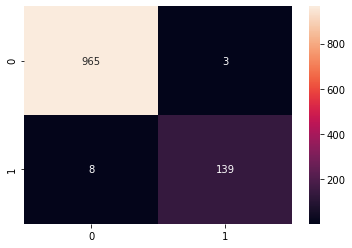

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot = True, fmt = 'd')
plt.show()

In [ ]:
# We are getting an accuracy of 0.99 which is a very good result.

In [50]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score :', round(auc_score, 3))

AUC Score : 0.991


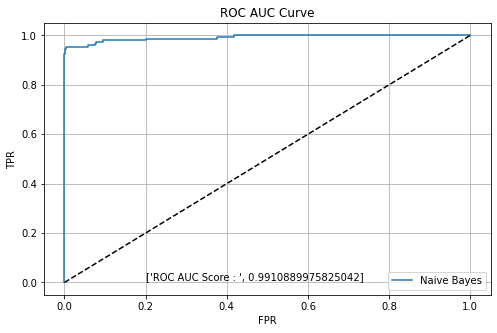

In [53]:
fpr, tpr, th = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = 'Naive Bayes')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.text(0.2, 0.01, s = ['ROC AUC Score : ', auc_score])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# We are getting a very good AUC Score.

In [56]:
# Comparing multiple models

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [60]:
y_pred_class = logreg.predict(X_test_dtm)

In [61]:
# Calculate the predicted probabilities for X_test_dtm

y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.00887053, 0.00304925, 0.00442746, ..., 0.03488683, 0.00819737,
       0.00226591])

In [62]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.99      0.93      0.96       147

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



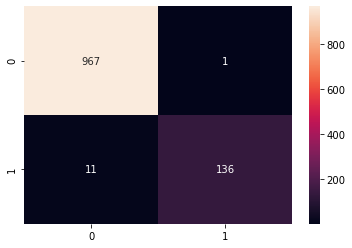

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot = True, fmt = 'd')
plt.show()

In [ ]:
# We are getting an accuracy of 0.99 which is a very good result.

In [68]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score :', round(auc_score, 3))

AUC Score : 0.999


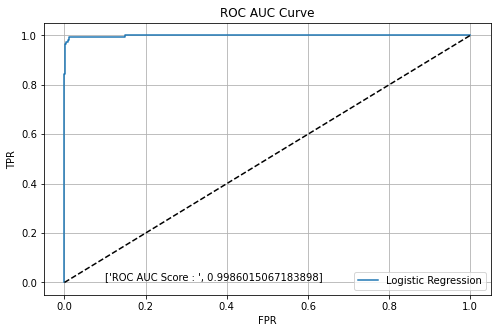

In [69]:
fpr, tpr, th = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.text(0.1, 0.01, s = ['ROC AUC Score : ', auc_score])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# We are getting a very good AUC Score.

In [77]:
# Fine tune vectorizer

toNumeric = CountVectorizer()
toNumeric

CountVectorizer()

In [78]:
# Remove English Stop Words
toNumeric = CountVectorizer(stop_words = 'english')
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

7457

In [79]:
# Include 1 and 2-grams
toNumeric = CountVectorizer(ngram_range = (1,2))
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

42862

In [82]:
# Ignore terms that appear in at least 2 documents
toNumeric = CountVectorizer(min_df = 2)
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

3663

In [74]:
from wordcloud import WordCloud 

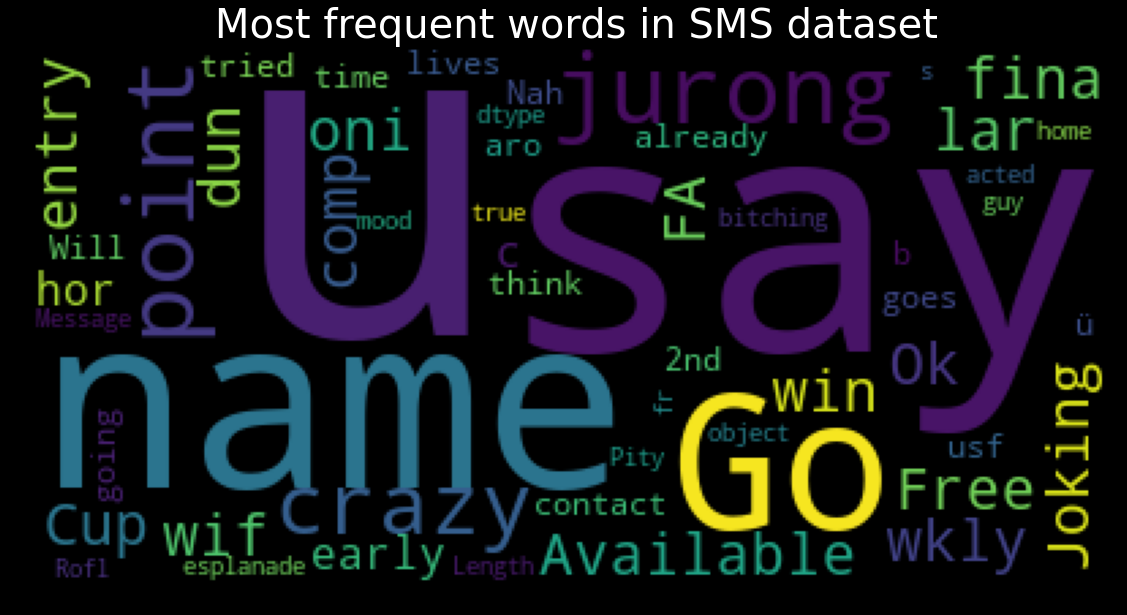

In [83]:
wc = WordCloud()
wc.generate(str(data['Message']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()